In [1]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz (120.2 MB)
  Using cached spacy-3.4.4-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.4 MB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Not uninstalling wasabi at /users/PAS0536/harshinikavuru26/.local/lib/python3.6/site-packages, outside environment /apps/project/ondemand/app_jupyter/3.0.17
    Can't uninstall 'wasabi'. No files were found to uninstall.
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.3
    Not uninstalling spacy at /users/PAS0536/harshinikavuru26/.local/lib/python3.6/site-packages, outside environment /apps/project/ondemand/app_jupyter/3.0.17
    Can't uninstall 'spacy'. No files were found to uninstall.
  Consider adding this directory to PATH or, if you

You should consider upgrading via the '/apps/project/ondemand/app_jupyter/3.0.17/bin/python -m pip install --upgrade pip' command.


In [29]:
import scispacy
import spacy
import joblib
import re
import string
import re
from nltk import word_tokenize
from collections import Counter
from tqdm import tqdm
from collections import defaultdict
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold, train_test_split
from scipy.sparse import coo_matrix, hstack

from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns

import torch
from transformers import BertTokenizer, BertModel
import gensim.downloader as api
from gensim.models import KeyedVectors

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [30]:
df=pd.read_csv("dfnew.csv")

In [5]:
df = pd.DataFrame(
    dict(
        text=df["text"],
        target=df["target"]))

In [6]:
df

,text,target
0,0002.0s 0002.5s SPEAKER_01: Umm\n 0003.3s 000...,Chest Pain
1,"0011.3s 0013.5s SPEAKER_00: 911, what's the a...",Sick Person
2,"0010.0s 0012.7s SPEAKER_00: 911, what is the ...",DOMESTIC
3,"0010.0s 0012.7s SPEAKER_00: 911, what is the ...",INJURED PERSON - BASIC
4,"0011.0s 0012.9s SPEAKER_01: 911, what's the a...",DIFFICULTY BREATHING
...,...,...
1456,"0012.7s 0014.9s SPEAKER_01: 911, what's the a...",911 CELLULAR HANG-UP/OPEN/MISDIAL
1457,0003.5s 0005.8s SPEAKER_01: Oh my god there's...,LOCKOUT - VEHICLE/OTHER
1458,"0011.8s 0013.6s SPEAKER_00: 911, what's the a...",SUSPICIOUS PERSON
1459,"0011.8s 0013.6s SPEAKER_00: 911, what's the a...",INJURED PERSON - BASIC


In [9]:
df['text'][0]

"0002.0s 0002.5s SPEAKER_01:  Umm\n 0003.3s 0006.7s SPEAKER_01:  I need you to do that for me now. I don't care, Tanya.\n 0006.4s 0010.8s SPEAKER_00:  Okay, I have your number at 740-971-8962, is that correct?\n 0011.1s 0011.5s SPEAKER_01:  Yeah.\n 0011.9s 0013.0s SPEAKER_00:  Okay, and what's your name?\n 0013.6s 0015.8s SPEAKER_01:  All in!\n 0014.6s 0014.9s SPEAKER_00:  KARGER!\n 0017.0s 0019.3s SPEAKER_00:  And you said, how old are you?\n 0018.6s 0020.5s SPEAKER_01:  how are you going to go to the car\n 0023.1s 0023.7s SPEAKER_00:  Howdy\n 0023.1s 0024.0s SPEAKER_01:  How are you, Kevin?\n 0024.4s 0025.0s SPEAKER_00:  27.\n 0025.6s 0025.9s SPEAKER_01:  K\n 0026.2s 0027.6s SPEAKER_00:  Are you still outside in the car?\n 0028.2s 0029.5s SPEAKER_01:  No, I didn't leave yet.\n 0030.2s 0036.2s SPEAKER_00:  Okay, yeah, we actually have medics coming to see you there at 317 Chelsea Street, Department D, okay? So you don't have to go anywhere.\n 0039.7s 0041.8s SPEAKER_00:  Okay, I'm jus

In [10]:
def process_text(text):
    text = str(text).lower()
#     text = re.sub(
#         f"[{re.escape(string.punctuation)}]", " ", text
#     )
    text = " ".join(text.split())
    return text

df["clean_text"] = df.text.map(process_text)

In [11]:
def unicodes_remove(text):
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    return text
df["clean_text"] = df.clean_text.map(unicodes_remove)

In [12]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in (stop)])
    return text
df["clean_text"] = df.clean_text.map(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/PAS0536/harshinikavuru26/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df

,text,target,clean_text
0,0002.0s 0002.5s SPEAKER_01: Umm\n 0003.3s 000...,Chest Pain,00020s 00025s speaker01 umm 00033s 00067s spea...
1,"0011.3s 0013.5s SPEAKER_00: 911, what's the a...",Sick Person,00113s 00135s speaker00 911 whats address emer...
2,"0010.0s 0012.7s SPEAKER_00: 911, what is the ...",DOMESTIC,00100s 00127s speaker00 911 address emergency ...
3,"0010.0s 0012.7s SPEAKER_00: 911, what is the ...",INJURED PERSON - BASIC,00100s 00127s speaker00 911 address emergency ...
4,"0011.0s 0012.9s SPEAKER_01: 911, what's the a...",DIFFICULTY BREATHING,00110s 00129s speaker01 911 whats address emer...
...,...,...,...
1456,"0012.7s 0014.9s SPEAKER_01: 911, what's the a...",911 CELLULAR HANG-UP/OPEN/MISDIAL,00127s 00149s speaker01 911 whats address emer...
1457,0003.5s 0005.8s SPEAKER_01: Oh my god there's...,LOCKOUT - VEHICLE/OTHER,00035s 00058s speaker01 oh god theres sheriff ...
1458,"0011.8s 0013.6s SPEAKER_00: 911, what's the a...",SUSPICIOUS PERSON,00118s 00136s speaker00 911 whats address emer...
1459,"0011.8s 0013.6s SPEAKER_00: 911, what's the a...",INJURED PERSON - BASIC,00118s 00136s speaker00 911 whats address emer...


In [14]:
model = spacy.load("en_ner_bc5cdr_md")

In [15]:
def keywords_extract(text):
  d=''
  for sent in [line.strip() for line in text.split(" ")]:
    doc = model(sent)
    for ent in doc.ents:
      if ent.label_=='CHEMICAL':
        d=d+(ent.text)
        d=d+' '
  d=d+'Now'
  return (d)
df["key_words_chemical"] = df.clean_text.map(keywords_extract)

In [16]:
def keywords_extract_1(text):
  d=''
  for sent in [line.strip() for line in text.split(" ")]:
    doc = model(sent)
    for ent in doc.ents:
      if ent.label_=='DISEASE':
        d=d+(ent.text)
        d=d+' '
  d=d+'No'
  return (d)
df["key_words_disease"] = df.clean_text.map(keywords_extract_1)

In [17]:
additional_keywords = ["chest", "stroke", "heart","cpr", "breathing", "breath","heart","breathe","blood","head","difficulty","pressure","shortness","left","muscle","drugs","arm","hurting"]
                       

In [18]:
def keywords_extract(text):
    d=''
    for keyword in additional_keywords:
        matches = re.findall(r'\b{}\b'.format(re.escape(keyword)), text, re.IGNORECASE)
        if matches:
            d+= ", ".join(matches)
            d=d+' '
    d=d+'-'
    return (d)
df["additional_keywords"] = df.clean_text.map(keywords_extract)

In [19]:
df

,text,target,clean_text,key_words_chemical,key_words_disease,additional_keywords
0,0002.0s 0002.5s SPEAKER_01: Umm\n 0003.3s 000...,Chest Pain,00020s 00025s speaker01 umm 00033s 00067s spea...,00551s 00644s 01143s 01352s 01352s 01603s 0165...,pain pain No,"heart breath heart breathe, breathe, breathe h..."
1,"0011.3s 0013.5s SPEAKER_00: 911, what's the a...",Sick Person,00113s 00135s speaker00 911 whats address emer...,01143s Now,fever headaches No,"heart, heart, heart breathing, breathing heart..."
2,"0010.0s 0012.7s SPEAKER_00: 911, what is the ...",DOMESTIC,00100s 00127s speaker00 911 address emergency ...,00482s alcohol 01667s Now,bleeding No,drugs arm -
3,"0010.0s 0012.7s SPEAKER_00: 911, what is the ...",INJURED PERSON - BASIC,00100s 00127s speaker00 911 address emergency ...,00482s alcohol 01667s Now,bleeding No,drugs arm -
4,"0011.0s 0012.9s SPEAKER_01: 911, what's the a...",DIFFICULTY BREATHING,00110s 00129s speaker01 911 whats address emer...,oxygen 00337s 00546s 00546s oxygen 01872s 0204...,death No,"heart, heart breathing, breathing, breathing, ..."
...,...,...,...,...,...,...
1456,"0012.7s 0014.9s SPEAKER_01: 911, what's the a...",911 CELLULAR HANG-UP/OPEN/MISDIAL,00127s 00149s speaker01 911 whats address emer...,Now,No,-
1457,0003.5s 0005.8s SPEAKER_01: Oh my god there's...,LOCKOUT - VEHICLE/OTHER,00035s 00058s speaker01 oh god theres sheriff ...,00152s oxygen oxygen oxygen Now,deaths No,-
1458,"0011.8s 0013.6s SPEAKER_00: 911, what's the a...",SUSPICIOUS PERSON,00118s 00136s speaker00 911 whats address emer...,Now,No,-
1459,"0011.8s 0013.6s SPEAKER_00: 911, what's the a...",INJURED PERSON - BASIC,00118s 00136s speaker00 911 whats address emer...,Now,No,-


In [31]:
unique_categories_num = df['target'].value_counts()
counts_df_full = pd.DataFrame({'Category': unique_categories_num.index, 'Count': unique_categories_num.values})
counts_df_full

,Category,Count
0,SICK PERSON,147
1,INJURED FROM A FALL,117
2,DIFFICULTY BREATHING,71
3,LIFT ASSIST,54
4,Sick Person,53
...,...,...
157,FIRE - OPEN BURN,1
158,LOST PROPERTY REPORT,1
159,Drunk,1
160,Missing Child,1


In [32]:
df['target'] = df['target'].str.lower()
df['New Category'] = df['target'].apply(lambda x: 'Fire' if 'fire' in x.lower() else ('cardiac_arrest' if 'cardiac' in x.lower() else ('heart_attack' if 'heart' in x.lower() else x)))
df['New Category'] = df['New Category'].apply(lambda x: 'heart_attack' if 'chest pain' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'stroke' if 'stroke' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'Major_trauma' if 'injured' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'Major_trauma' if 'injury' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'seizure' if 'convulsion/seizures' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'difficulty breathing' if 'overdose / poisoning' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'difficulty breathing' if 'overdose - poisoning' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'difficulty breathing' if 'choking' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'Major_trauma' if 'fall' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'difficulty breathing' if 'overdose/poisoning' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: '911 cellular hang-up/open/misdial' if '911 hang-up/open/misdial' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: '911 cellular hang-up/open/misdial' if 'duplicate call' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'suspicious person' if 'suspicious person/vehicle' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'heart_attack' if 'cardiac_arrest' in x.lower() else x)

In [33]:
unique_categories_num = df['New Category'].value_counts()
counts_df_full = pd.DataFrame({'Category': unique_categories_num.index, 'Count': unique_categories_num.values})
counts_df_full

,Category,Count
0,Major_trauma,205
1,sick person,200
2,difficulty breathing,131
3,lift assist,88
4,heart_attack,86
...,...,...
80,theft/larceny,1
81,medical alarm,1
82,follow-up/investigation,1
83,investigation,1


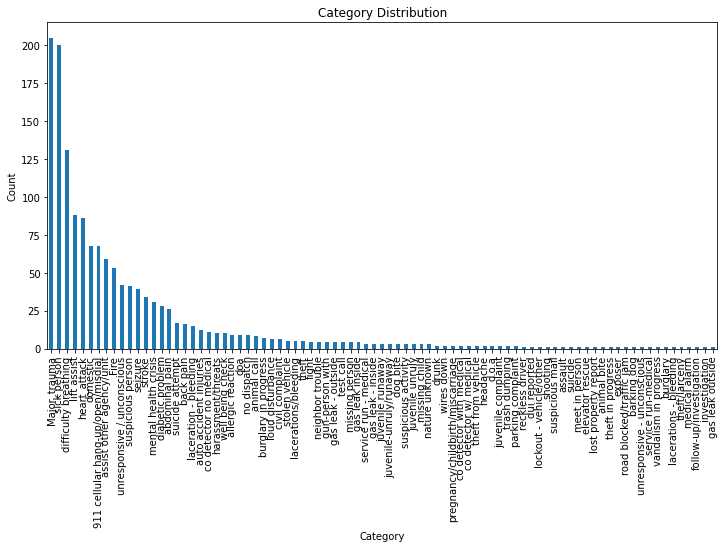

In [34]:
fig = plt.figure(figsize=(12, 6))
unique_categories_num.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [35]:
category_counts = df['New Category'].value_counts()
limit = 59
selected_categories = category_counts[category_counts > limit].index.tolist()
df = df.loc[df['New Category'].isin(selected_categories)]

In [36]:
unique_category_nums = df['New Category'].value_counts()
counts_df_full = pd.DataFrame({'Category': unique_category_nums.index, 'Count': unique_category_nums.values})
counts_df_full

,Category,Count
0,Major_trauma,205
1,sick person,200
2,difficulty breathing,131
3,lift assist,88
4,heart_attack,86
5,911 cellular hang-up/open/misdial,68
6,domestic,68


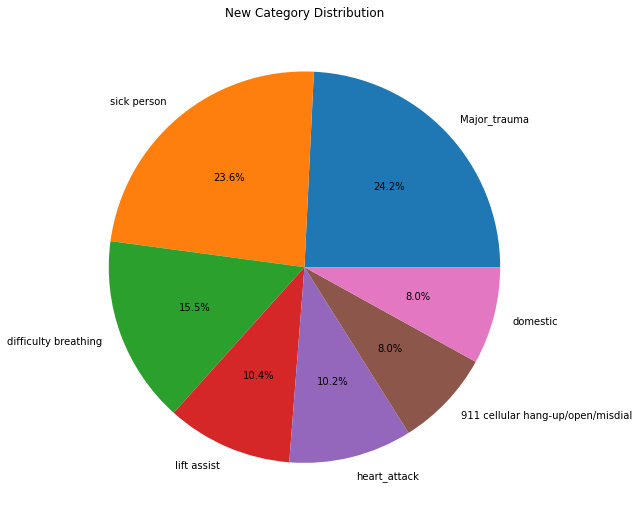

In [37]:
fig = plt.figure(figsize=(9, 9))
plt.pie(unique_category_nums.values, labels= unique_category_nums.index, autopct='%1.1f%%')
plt.title('New Category Distribution')
plt.show()

In [38]:
df['New Category'] = df['New Category'].apply(lambda x: 'heart_attack' if 'stroke' in x.lower() else x)
df['New Category'] = df['New Category'].apply(lambda x: 'others' if x != 'heart_attack' else x)

In [40]:
unique_category_nums = df['New Category'].value_counts()
counts_df_full = pd.DataFrame({'Category': unique_category_nums.index, 'Count': unique_category_nums.values})
counts_df_full

,Category,Count
0,others,760
1,heart_attack,86


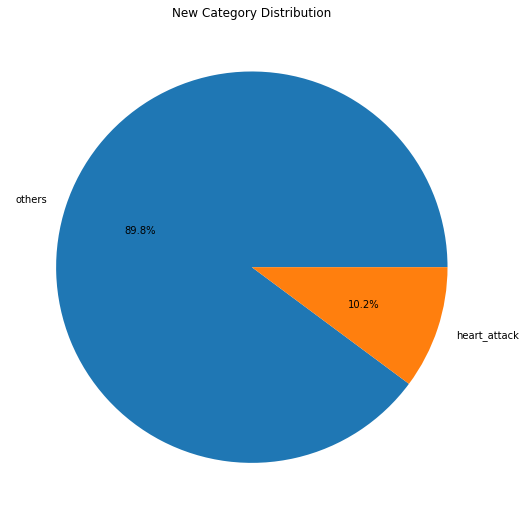

In [41]:
fig = plt.figure(figsize=(9, 9))
plt.pie(unique_category_nums.values, labels= unique_category_nums.index, autopct='%1.1f%%')
plt.title('New Category Distribution')
plt.show()